# ECONOMETRIZANDO - Parte 2

## Sobre o Estudo

Nesse projeto, vamos usar como referência a hipótese e os dados do excelente artigo: *"As Origens Coloniais do Desenvolvimento Comparativo: Uma Investigação Empírica"* dos autores: Daron Acemoglu, Simon Johnson, James A. Robinson

**Fonte:** The American Economic Review, Vol. 91, No. 5 (Dez., 2001), pp. 1369-1401 https://www.aeaweb.org/articles?id=10.1257/aer.91.5.1369

--

- **PROPÓSITOS:**<br>
Aplicar o conceito de variáveis instrumentais de forma teórica usando um modelo de 2 etapas para analisar a hipótese dos autores: *o desempenho econômico observado pode ser atribuído às diferenças institucionais.*
Além disso, analisa-se o quão importantes são as instituições e os direitos de propriedade para o desenvolvimento econômico.

Os autores do artigo propõem 3 premissas:

1. Os diferentes tipos de políticas de colonização criaram diferentes conjuntos de instituições. Em um extremo, os europeus estabeleceram “Estados extrativos”, instituições que não ofereceram muita proteção à propriedade privada, nem estabeleceram um sistema de pesos e contrapesos contra a expropriação do governo. No outro extremo, muitos europeus emigraram e se estabeleceram em várias colônias, criando “novas Europas”. Os colonizadores tentaram replicar as instituições europeias, com grande ênfase na propriedade privada e no controle do poder do governo.

2. A viabilidade dos assentamentos influenciou a estratégia de colonização. Em lugares onde o ambiente insalubre não era favorável ao assentamento europeu, não era possível criar “novas Europas”, e era mais viável a formação do Estado extrativo. O Estado colonial e as instituições persistiram mesmo após a independência.

3. Na hipótese de as taxas de mortalidade (potenciais) dos colonizadores terem sido o principal determinante dos assentamentos; os assentamentos foram um determinante importante das instituições iniciais (na prática, as instituições de 1900); e existe uma forte correlação entre as instituições iniciais e as instituições atuais.

- **PONTOS IMPORTANTES:** <br>
1. Como medimos as diferenças institucionais e os resultados econômicos?

2. Os resultados econômicos de uma economia são aproximados pelo logaritmo do PIB per capita em 1995, ajustados pela paridade do poder de compra, PPC.

3. As diferenças institucionais são aproximadas pelo índice de proteção contra a expropriação, que reporta um valor entre 0 e 10 para cada país e ano, onde 0 corresponde à menor proteção contra a expropriação. Foi utilizado o valor médio de cada país entre 1985 e 1995 (“risco de expropriação” médio 1985-95, este índice foi construído pelo Grupo de Serviços de Risco Político https://www.prsgroup.com/).

4. A principal contribuição do artigo é o uso das taxas de mortalidade como fonte de variação exógena nas diferenças institucionais.

5. Essa variação é necessária para determinar se são as instituições que levam a um maior crescimento econômico, e não o contrário.

## De forma mais didática

Imagine que estamos explorando como certas coisas que aconteceram no passado afetam o modo como os países são hoje em dia. Temos um artigo escrito por alguns competentes pesquisadores que estudaram sobre isso.

Acemoglu e os demais propõem algumas ideias sobre como a forma como os países foram colonizados no passado influenciou suas instituições e, por consequência, seu desenvolvimento econômico atual.

Eles sugerem que a maneira como os europeus colonizaram diferentes partes do mundo criou diferentes tipos de sistemas de governo e leis. Alguns lugares acabaram com governos que não protegiam muito bem a propriedade privada das pessoas, enquanto outros lugares tiveram sistemas mais parecidos com os da Europa, com maior proteção à propriedade.

Eles também acham que a dificuldade de viver em certos lugares influenciou como esses lugares foram colonizados. Em alguns lugares onde era difícil para os europeus viverem, acabaram sendo criados governos que não protegiam tanto a propriedade das pessoas.

Os pesquisadores têm uma hipótese. Eles pensam que a taxa de mortalidade dos colonizadores, ou seja, quantos deles morriam quando chegavam em um lugar novo, foi o principal fator que determinou como esses lugares foram colonizados e, consequentemente, como suas instituições foram formadas. Eles acreditam que as instituições criadas naquela época continuam a influenciar o desenvolvimento econômico desses lugares hoje em dia.

Então, para testar essas ideias, alguns dados econômicos, como o Produto Interno Bruto (PIB) per capita em 1995, e também para um índice que mede o quão bem os governos protegem a propriedade privada das pessoas.

A parte mais interessante é que eles usam a taxa de mortalidade dos colonizadores como uma espécie de "atalho" para entender como as instituições foram formadas. Eles pensam que olhando para essa taxa, podem entender melhor como as instituições afetaram o desenvolvimento econômico ao longo do tempo.

## Sobre os dados

Com a ajuda da instrução read_stata, vamos ler os dados. Nosso DataFrame contém as seguintes informações:
- shortnam - Abreviação do Nome do país.
- euro1900 - Restrições ao Executivo em 1900
- excolony: variável dummy 1- excolonia -0 não excolonia
- logpgp95 - logaritmo do PIB per capita em 1995
- avexpr - logaritmo da taxa de mortalidade dos colonizadores para uma amostra de 75 países,
- cons1 - Restrição ao executivo no primeiro ano de independência
- cons90 - Restrição ao executivo em 1900
- democ00a - Índice de democracia 1900
- cons00a - Restrição ao executivo em 2000
- extmort4 - taxa de mortalidade externa em 4 anos (imagino que só possa ser isso, pois não encontrei a descrição)
- logem4 - Logaritmo do PIB por trabalhador, 1988
- loghjypl - IDH
- baseco

A base de dados pode ser baixada [AQUI]

### Bibliotecas

In [11]:
# !pip install linearmodels

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.graph_objs as go
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IVLIML, IV2SLS, IVLIML, IVGMM, IVGMMCUE
import warnings
warnings.filterwarnings('ignore')

### Dados

In [13]:
df = pd.read_stata('maketable1.dta')
df

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,YUG,100.000000,0.0,6.318182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.203973,NaN
159,ZAF,22.000000,1.0,6.863636,8.885994,3.0,7.0,3.0,3.0,15.500000,2.740840,-1.386294,1.0
160,ZAR,8.000000,1.0,3.500000,6.866933,1.0,1.0,0.0,1.0,240.000000,5.480639,-3.411248,1.0
161,ZMB,3.000000,1.0,6.636364,6.813445,3.0,1.0,0.0,1.0,NaN,NaN,-2.975930,NaN


Nota-se que os nomes das colunas no conjunto de dados não são muito explicativos, por isso, as renomearei

In [14]:
df.columns

Index(['shortnam', 'euro1900', 'excolony', 'avexpr', 'logpgp95', 'cons1',
       'cons90', 'democ00a', 'cons00a', 'extmort4', 'logem4', 'loghjypl',
       'baseco'],
      dtype='object')

df = df.rename(columns= {
    'shortnam': 'pais',
    'excolony': 'colonia', # 1 para colônia e 0 para não colônia
    'avexpr': 'log_txmortal',
    'logpgp95': 'log_ppc95',
    'cons1': 'res_exec_1ano',
    'cons90': 'res_exec_1900',
    'democ00a': 'ind_democ_1900',
    'cons00a': 'res_exec_2k',
    'extmort4': 'mort_ext_4y',
    'logem4': 'log_pb_1988',
    'loghjypl': 'idh'
})
df

In [15]:
# Tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   shortnam  163 non-null    object 
 1   euro1900  154 non-null    float32
 2   excolony  162 non-null    float32
 3   avexpr    121 non-null    float32
 4   logpgp95  148 non-null    float32
 5   cons1     88 non-null     float32
 6   cons90    88 non-null     float32
 7   democ00a  87 non-null     float32
 8   cons00a   91 non-null     float32
 9   extmort4  87 non-null     float32
 10  logem4    87 non-null     float32
 11  loghjypl  123 non-null    float32
 12  baseco    64 non-null     float32
dtypes: float32(12), object(1)
memory usage: 9.0+ KB


In [16]:
# Valores nulos
df.isnull().sum()

shortnam     0
euro1900     9
excolony     1
avexpr      42
logpgp95    15
cons1       75
cons90      75
democ00a    76
cons00a     72
extmort4    76
logem4      76
loghjypl    40
baseco      99
dtype: int64

Nota-se uma grande quantidade de dadis nulos, deixaremos para tratá-los mais à frente.

In [17]:
# Valores duplicados
df.duplicated().sum()

0

In [18]:
# Estatistica descritiva
df.describe()

,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
count,154.000000,162.000000,121.000000,148.000000,88.000000,88.000000,87.000000,91.000000,87.000000,87.000000,123.000000,64.0
mean,30.466232,0.666667,7.066491,8.302509,3.590909,3.636364,1.149425,1.857143,220.926437,4.595984,-1.731106,1.0
std,42.389839,0.472866,1.804287,1.105342,2.414688,2.339967,2.576858,1.823131,411.498260,1.303333,1.083726,0.0
min,0.000000,0.000000,1.636364,6.109248,1.000000,1.000000,0.000000,1.000000,2.550000,0.936093,-3.540459,1.0
25%,0.000000,0.000000,5.886364,7.376192,1.000000,1.750000,0.000000,1.000000,68.350006,4.224609,-2.741120,1.0
50%,1.950000,1.000000,7.045455,8.265764,3.000000,3.000000,0.000000,1.000000,85.000000,4.442651,-1.560648,1.0
75%,91.625000,1.000000,8.272727,9.216228,7.000000,7.000000,1.000000,1.000000,253.259995,5.610119,-0.831277,1.0
max,100.000000,1.000000,10.000000,10.288750,7.000000,7.000000,10.000000,7.000000,2940.000000,7.986165,0.000000,1.0


### Relação: Proteção Média contra o Risco de Expropriação x Logaritmo do PIB per capita

Aqui inicialmente desejamos entender a relação entre essas duas variáveis e estimar uma linha de melhor ajuste que represente essa relação, para isso usamos uma análise de regressão linear simples entre as duas variáveis. Isso ajuda a entender a direção e a força da relação entre as variáveis e fornece uma base para previsões ou inferências adicionais.

Calculamos as variâncias e a covariância das variáveis, estimando os coeficientes da regressão linear (interceptação e inclinação da linha), e depois realizamos um plot dos dados originais juntamente com a linha de regressão estimada para visualização. 

In [19]:
# Removemos linhas com valores ausentes nas duas variáveis de interesse
data_clean = df.dropna(subset=['logpgp95', 'avexpr'])

# Definimos as variáveis independentes (X) e dependentes (Y)
X = data_clean['logpgp95']
Y = data_clean['avexpr']

# Adicionamos uma constante a variável independente (X) para estimar o termo de interceptação
X = sm.add_constant(X)

# Estimamos a regressão linear
model = sm.OLS(Y, X, missing='drop')
results = model.fit()

# Imprimindo um sumário do modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 29 May 2024   Prob (F-statistic):           4.16e-24
Time:                        19:54:01   Log-Likelihood:                -162.48
No. Observations:                 111   AIC:                             329.0
Df Residuals:                     109   BIC:                             334.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5160      0.749     -3.358      0.0

Concluímos que: 
- R-quadrado (R²): 0.611, indicando que aproximadamente 61.1% da variação na qualidade das instituições ('avexpr') pode ser explicada pelo PIB per capita logarítmico ('logpgp95')

- Coeficiente de 'logpgp95': 1.1494, sugerindo que um aumento de 1 unidade no logaritmo do PIB per capita está associado a um aumento de aproximadamente 1.15 na qualidade das instituições

- Intercepto: -2.5160, indicando que, teoricamente, um país com um PIB per capita logarítmico de zero teria uma qualidade institucional negativa (o que pode não ser realista, mas é um resultado da modelagem linear)

- Significância Estatística: o valor p para 'logpgp95' é extremamente baixo (< 0.0001), indicando que o coeficiente é muito significativo

- Distribuição dos Resíduos: no teste de Omnibus e Jarque-Bera vimos que os resíduos da regressão são normalmente distribuídos

Ou seja, os dados indicam uma relação positiva e significativa entre o PIB per capita logarítmico e a qualidade das instituições, sugerindo que países com maior PIB per capita tendem a ter instituições de melhor qualidade. 

A variabilidade explicada pelo modelo é moderada (61.1%), o que indica que outros fatores além do PIB per capita também influenciam a qualidade das instituições. A análise destaca a importância do desenvolvimento econômico para a qualidade institucional, mas também sugere a necessidade de considerar outras variáveis para uma compreensão mais completa.

In [20]:
# Obtenha os coeficientes estimados da regressão
intercept, slope = results.params

# Crie os pontos da linha de regressão
regression_line = intercept + slope * data_clean['logpgp95']

# Crie o scatter plot com Plotly
fig = px.scatter(data_clean, x='logpgp95', y='avexpr', opacity=0.5, title='Regressão Linear entre logpgp95 e avexpr')
fig.add_trace(go.Scatter(x=data_clean['logpgp95'], y=regression_line, mode='lines', name='Linha de Regressão', line=dict(color='red')))

# Adicione anotação do autor
fig.add_annotation(
    text='Autor: Jonatas A. Liberato',
    xref='paper', yref='paper',
    x=1, y=-0.2,
    showarrow=False,
    font=dict(size=12)
)

# Atualize os rótulos dos eixos e defina o tamanho do gráfico
fig.update_layout(
    xaxis_title='logpgp95',
    yaxis_title='avexpr',
    width=700,  # Definindo a largura do gráfico
    height=500  # Opcional: definindo a altura do gráfico
)

# Mostre o gráfico
fig.show()


NameError: name 'px' is not defined

### Correlação entre as variáveis

Vamos dar uma olhada nas relações entre as variáveis

In [ ]:
# Separando varaveis numéricas de categóricas
df_num = df.select_dtypes(include= 'number')

# Matriz de correlação
correlacao = df_num.corr()
print('Matriz de Correlação')
correlacao

Matriz de Correlação


,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
euro1900,1.000000,-0.689273,0.651259,0.543301,0.105453,0.539373,0.760907,0.681130,-0.240488,-0.619421,0.667556,NaN
excolony,-0.689273,1.000000,-0.544850,-0.351238,-0.152230,0.121484,0.006289,-0.124190,0.052674,0.175785,-0.514670,NaN
avexpr,0.651259,-0.544850,1.000000,0.781871,0.164761,0.550720,0.464887,0.405621,-0.258020,-0.551757,0.744358,NaN
logpgp95,0.543301,-0.351238,0.781871,1.000000,0.202709,0.614515,0.507646,0.455448,-0.406272,-0.704763,0.921999,NaN
cons1,0.105453,-0.152230,0.164761,0.202709,1.000000,0.279989,0.067338,0.020381,0.043582,-0.230706,0.086061,NaN
cons90,0.539373,0.121484,0.550720,0.614515,0.279989,1.000000,0.448136,0.418775,-0.302129,-0.550856,0.613374,NaN
democ00a,0.760907,0.006289,0.464887,0.507646,0.067338,0.448136,1.000000,0.936181,-0.217778,-0.514465,0.571446,NaN
cons00a,0.681130,-0.124190,0.405621,0.455448,0.020381,0.418775,0.936181,1.000000,-0.208006,-0.461551,0.558489,NaN
extmort4,-0.240488,0.052674,-0.258020,-0.406272,0.043582,-0.302129,-0.217778,-0.208006,1.000000,0.674897,-0.433068,NaN
logem4,-0.619421,0.175785,-0.551757,-0.704763,-0.230706,-0.550856,-0.514465,-0.461551,0.674897,1.000000,-0.770399,NaN


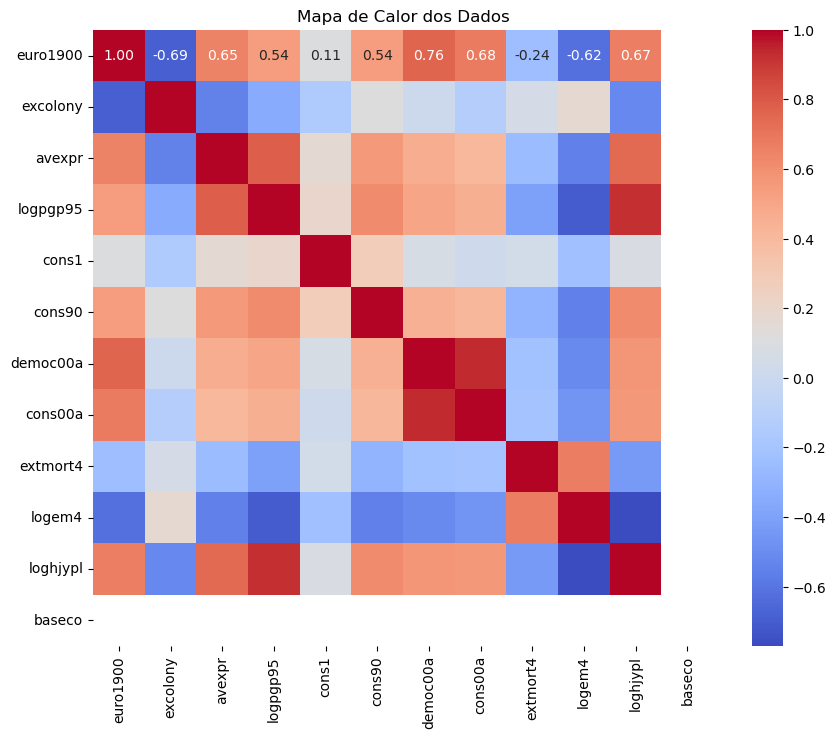

In [ ]:
# Plotando comheatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Mapa de Calor dos Dados')
plt.show()

#### Aqui já tiramos algumas forte correlações entre as variáveis, como por exemplo:

- as variáveis relacionadas ao desempenho econômico (como log_ppc95 e IDH) têm uma forte correlação positiva, o que sugere que economias com maior Produto Interno Bruto (PIB) per capita tendem a ter um maior Índice de Desenvolvimento Humano (IDH)

- variável euro1900, que representa a influência colonial europeia, mostra uma correlação positiva com várias outras variáveis, como idh e ind_democ_1900 (índice de democracia em 1900). Isso sugere que regiões com maior influência colonial europeia tendem a ter melhores indicadores de desenvolvimento humano e maior probabilidade de democracia

- taxa de mortalidade dos colonizadores (mort_ext_4y) apresenta uma correlação negativa com várias variáveis, incluindo log_ppc95 (PIB per capita) e IDH. Isso indica que em áreas onde os colonizadores enfrentaram maior mortalidade, o desenvolvimento econômico e humano tende a ser menor

- a variável ind_democ_1900, que mede a democracia em 1900, mostra uma forte correlação positiva com outras variáveis relacionadas ao desenvolvimento, como log_ppc95 (PIB per capita) e IDH. Isso sugere que a presença de instituições democráticas no passado está associada a melhores resultados econômicos e sociais.

- as variáveis relacionadas às instituições coloniais (euro1900 e res_exec_1900) têm uma forte correlação com o desenvolvimento atual. Isso indica que as instituições estabelecidas durante o período colonial podem ter um impacto duradouro no desenvolvimento socioeconômico das regiões.

- a presença de instituições democráticas (ind_democ_1900) está positivamente correlacionada com melhores resultados econômicos e sociais, como maior PIB per capita e Índice de Desenvolvimento Humano. Isso sugere que a democracia no período colonial pode ter influenciado positivamente o desenvolvimento futuro.

### Dispersão dos Dados

Nesta análise gráfica, estamos explorando a relação entre duas variáveis: 'avexpr', que representa a Proteção Média contra o Risco de Expropriação de 1985 a 1995, e 'logpgp95', que é o Logaritmo do PIB per capita entre 1975 e 1995. Ao observar o gráfico de dispersão dessas variáveis, podemos identificar que tipo de relação existe entre elas.

Observarmos uma tendência ascendenteno gráfico de dispersão, indicando uma relação linear positiva entre as variáveis. Também é possível identificar padrões não lineares, como curvas ou agrupamentos de pontos, que indicariam relações mais complexas entre as variáveis.

In [ ]:
# Criar o gráfico de dispersão
fig = go.Figure()
# Adicionar os dados
fig.add_trace(go.Scatter(x=df['avexpr'], y=df['logpgp95'], mode='markers'))
# Atualizar o layout para definir as dimensões
fig.update_layout(
    height=600,
    width=800,
    title=dict(text="Proteção média contra o risco de expropriação x PIB per capita (1975 - 1995)", x=0.5, y=0.98, font=dict(size=16)),
    xaxis_title="Risco de expropriação",
    yaxis_title="PIB per capita",
    annotations=[dict(text="Autor: Jonatas A. Liberato", x=0.98, y=-0.1, xref="paper", yref="paper", showarrow=False)],
)
# Exibir o gráfico
fig.show()

Este gráfico revela uma tendência ascendente, indicando uma relação linear positiva entre a proteção contra expropriação e o PIB per capita.

### Qualidade Institucional x Desempenho Econômico

Nosso objetivo aqui é mostrar que melhorar a qualidade das instituições (especialmente a proteção contra expropriação) pode levar a um melhor desempenho econômico, influenciando políticas públicas, decisões de investimento e estratégias de desenvolvimento.

Para isso propomos algumas explicações:
- Índice de Proteção Contra o Risco de Expropriação: Este índice mede quão bem as instituições (como governo, sistema legal, etc.) protegem os direitos de propriedade dos indivíduos contra a expropriação (ou seja, contra o governo tomar seus bens sem justa compensação).

- Qualidade Institucional: Quando dizemos que uma instituição é de "alta qualidade", significa que ela funciona bem, protegendo os direitos das pessoas e sendo eficiente e justa.

- Desempenho Econômico: Isso geralmente é medido pelo PIB per capita, que é o valor total de todos os bens e serviços produzidos em um país dividido pelo número de habitantes. Um PIB per capita elevado indica uma economia próspera.

- Relação: A frase sugere que se as instituições de um país são melhores (medido por um alto índice de proteção contra expropriação), então esse país tende a ter um melhor desempenho econômico (medido por um PIB per capita elevado).

Para entender essa relação, podemos criar um modelo simples que usa o PIB per capita como a variável que queremos prever (variável dependente) e o Índice Médio de Proteção contra o risco de expropriação como a variável que usamos para fazer a previsão (variável explicativa).

Onde:

- Modelo Bivariado: análise estatística que examina a relação entre duas variáveis

- Variável Dependente: variável dependente é o PIB per capita, o que significa que estamos tentando entender o que influencia o PIB per capita

- Variável Explicativa: é o Índice de Proteção contra o risco de expropriação. Isso significa que estamos usando este índice para tentar explicar as variações no PIB per capita

In [ ]:
df.head(3)

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.0,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.0,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.0,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df[['logpgp95', 'avexpr']].isna().sum())

logpgp95    15
avexpr      42
dtype: int64


In [ ]:
dados_limpos = df.copy()

In [ ]:
# Fazemos uma limpeza nos dados para evitar distorções de valores NaN
dados_limpos = dados_limpos.dropna(subset=['logpgp95', 'avexpr'])
dados_limpos

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
5,AUS,98.000000,1.0,9.318182,9.897972,7.0,7.0,10.0,7.0,8.550000,2.145931,-0.170788,1.0
6,AUT,100.000000,0.0,9.727273,9.974877,NaN,NaN,NaN,NaN,NaN,NaN,-0.343900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,YEM,0.000000,1.0,6.363636,6.646390,NaN,NaN,NaN,NaN,NaN,NaN,-1.551169,NaN
159,ZAF,22.000000,1.0,6.863636,8.885994,3.0,7.0,3.0,3.0,15.500000,2.740840,-1.386294,1.0
160,ZAR,8.000000,1.0,3.500000,6.866933,1.0,1.0,0.0,1.0,240.000000,5.480639,-3.411248,1.0
161,ZMB,3.000000,1.0,6.636364,6.813445,3.0,1.0,0.0,1.0,NaN,NaN,-2.975930,NaN


### Separando os registros onde baseco é igual a 1

Criamos a variável "baseco" para garantir que as análises econométricas sejam conduzidas em um conjunto de dados específico e relevante, Ou seja, indica observações válidas e pertinentes, assegurando que as inferências sobre a relação entre instituições coloniais e desempenho econômico sejam robustas e significativas.

In [ ]:
dados_limpos = dados_limpos[dados_limpos['baseco'] == 1]
dados_limpos

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
5,AUS,98.000000,1.0,9.318182,9.897972,7.0,7.0,10.0,7.0,8.550000,2.145931,-0.170788,1.0
11,BFA,0.000000,1.0,4.454545,6.845880,3.0,1.0,0.0,1.0,280.000000,5.634789,-3.540459,1.0
12,BGD,0.000000,1.0,5.136364,6.877296,7.0,2.0,0.0,1.0,71.410004,4.268438,-2.063568,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,USA,87.500000,1.0,10.000000,10.215740,7.0,7.0,10.0,7.0,15.000000,2.708050,0.000000,1.0
155,VEN,20.000000,1.0,7.136364,9.071078,1.0,3.0,1.0,3.0,78.099998,4.357990,-0.703197,1.0
156,VNM,0.000000,1.0,6.409091,7.279319,1.0,3.0,0.0,1.0,140.000000,4.941642,NaN,1.0
159,ZAF,22.000000,1.0,6.863636,8.885994,3.0,7.0,3.0,3.0,15.500000,2.740840,-1.386294,1.0


Plotando

In [ ]:
# Reservando os labels dos países
paises = dados_limpos['shortnam']
paises

1      AGO
3      ARG
5      AUS
11     BFA
12     BGD
      ... 
153    USA
155    VEN
156    VNM
159    ZAF
160    ZAR
Name: shortnam, Length: 64, dtype: object

In [ ]:
# Separando PPC 1995 e Taxa de Mortalidade de Colonizadores
x = dados_limpos['avexpr']
y = dados_limpos['logpgp95']

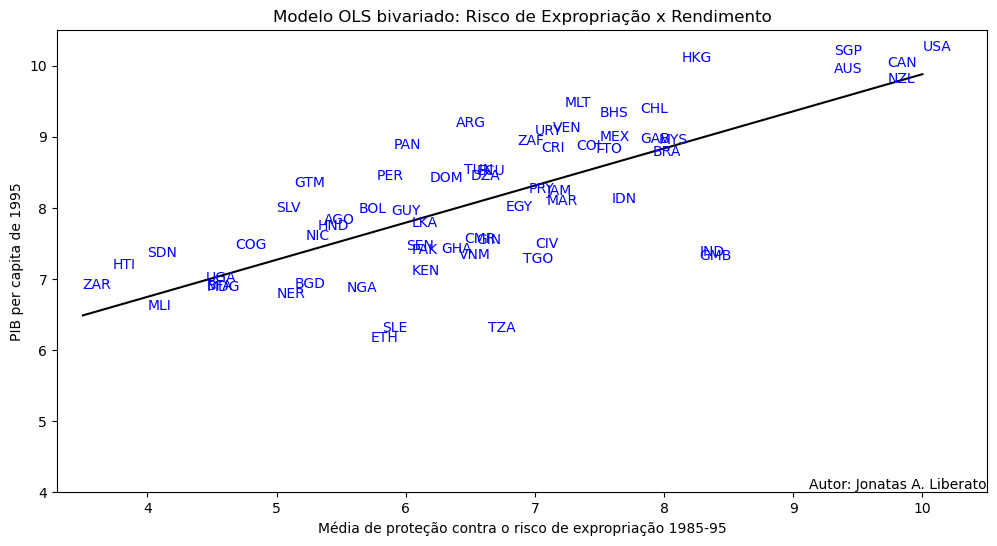

In [ ]:
# Substituindo os pontos pelas labels dos países
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(x, y, marker = '')

for i, pais in enumerate(paises):
    ax.annotate(pais, (x.iloc[i], y.iloc[i]), color='blue')

# Linha de tendência
ax.plot(np.unique(x),
        np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
        color='black')

# Configurações do gráfico
ax.set_xlim([3.3, 10.5])
ax.set_ylim([4, 10.5])
ax.set_xlabel('Média de proteção contra o risco de expropriação 1985-95')
ax.set_ylabel('PIB per capita de 1995')
ax.set_title('Modelo OLS bivariado: Risco de Expropriação x Rendimento')

# Anotação do autor no canto inferior direito
plt.annotate('Autor: Jonatas A. Liberato',
             xy=(1.0, 0.0002),
             xycoords='axes fraction',
             ha='right',
             va='bottom')

# Exibir o gráfico
plt.show()

### Estimativas com Modelo OLS

Aqui nós usamos o modelo OLS (Ordinary Least Squares), que é uma técnica usada para estimar os parâmetros de uma regressão linear e nesse caso, para examinar a relação entre a qualidade institucional (medida pelo índice de proteção contra expropriação) e o desempenho econômico (medido pelo logaritmo do PIB per capita em 1995).

Criando o intercepto

É necessária a criação de uma constante (ou intercepto) para ajustar adequadamente a linha de regressão aos dados, ela permite que o modelo ajuste o nível médio da variável dependente (no caso, o logaritmo do PIB per capita) quando todas as variáveis explicativas (como a proteção contra expropriação) são iguais a zero.

Sem essa constante, o modelo seria forçado a passar pela origem (ponto onde todas as variáveis explicativas são zero), o que raramente é apropriado para dados econômicos e pode levar a um ajuste inadequado.

In [ ]:
dados_limpos['ols'] = 1
dados_limpos

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco,ols
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0,1
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0,1
5,AUS,98.000000,1.0,9.318182,9.897972,7.0,7.0,10.0,7.0,8.550000,2.145931,-0.170788,1.0,1
11,BFA,0.000000,1.0,4.454545,6.845880,3.0,1.0,0.0,1.0,280.000000,5.634789,-3.540459,1.0,1
12,BGD,0.000000,1.0,5.136364,6.877296,7.0,2.0,0.0,1.0,71.410004,4.268438,-2.063568,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,USA,87.500000,1.0,10.000000,10.215740,7.0,7.0,10.0,7.0,15.000000,2.708050,0.000000,1.0,1
155,VEN,20.000000,1.0,7.136364,9.071078,1.0,3.0,1.0,3.0,78.099998,4.357990,-0.703197,1.0,1
156,VNM,0.000000,1.0,6.409091,7.279319,1.0,3.0,0.0,1.0,140.000000,4.941642,NaN,1.0,1
159,ZAF,22.000000,1.0,6.863636,8.885994,3.0,7.0,3.0,3.0,15.500000,2.740840,-1.386294,1.0,1


### Constuindo o o modelo OLS

In [ ]:
modelo_ols = sm.OLS(endog = dados_limpos['logpgp95'], exog = dados_limpos[['ols', 'avexpr']], missing = 'drop')
res = modelo_ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     72.82
Date:                Tue, 28 May 2024   Prob (F-statistic):           4.72e-12
Time:                        21:52:52   Log-Likelihood:                -68.168
No. Observations:                  64   AIC:                             140.3
Df Residuals:                      62   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ols            4.6604      0.409     11.408      0.0

A conclusão que temos é que o modelo de regressão OLS mostra uma relação positiva e estatisticamente significativa entre a proteção contra expropriação e o logaritmo do PIB per capita em 1995. Com um R-quadrado de 0.540, o modelo explica uma porção considerável da variabilidade na variável dependente. 

A significância estatística dos coeficientes e das estatísticas de ajuste sugere que a proteção contra expropriação é um forte preditor do PIB per capita.

### Prevendo os níveis de Renda Per Capita

Caso você nunca tenha ouvido falar sobre o assunto, o nível de renda per capita é uma medida que indica a média da renda de uma determinada área (como um país, estado ou região) dividida pelo número de pessoas que vivem nessa área. É frequentemente usado como uma medida básica do padrão de vida e desenvolvimento econômico de uma população.

Quanto maior o nível de renda per capita, em geral, melhor são as condições econômicas e sociais, incluindo acesso a educação, saúde, moradia e outros serviços básicos. É uma medida importante para avaliar a qualidade de vida e o progresso econômico de uma sociedade.

In [ ]:
# Média da variávels avexpr
mean_avexpr = np.mean(dados_limpos['avexpr'])
mean_avexpr

6.515625

In [ ]:
# Predição
res.predict(exog = [1, mean_avexpr])

array([8.06223691])

Previsão para cada valor

In [ ]:
# Eliminamos os valores nulos
dados_limpos_plot = dados_limpos.dropna( subset = ['logpgp95', 'avexpr'] )

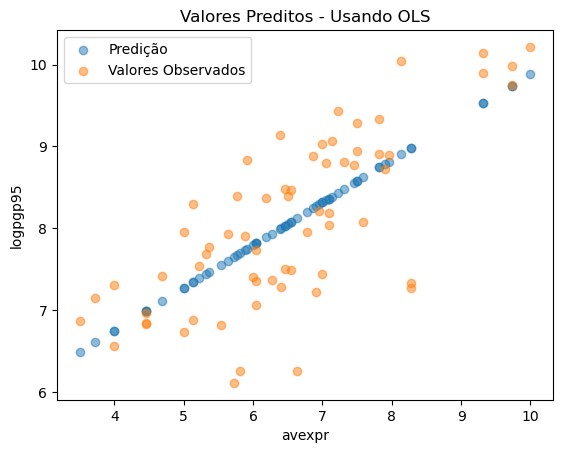

In [ ]:
fix, ax = plt.subplots()
ax.scatter( dados_limpos_plot['avexpr'], 
            res.predict(), 
            alpha = 0.5,
            label = 'Predição' )

# Graficamos los valores observados
dados_limpos
ax.scatter(dados_limpos_plot['avexpr'], 
           dados_limpos_plot['logpgp95'], 
           alpha = 0.5, 
           label = 'Valores Observados')

ax.legend()
ax.set_title('Valores Preditos - Usando OLS')
ax.set_xlabel('avexpr')
ax.set_ylabel('logpgp95')
plt.show()

### Modelo Multivariado

Até agora, nosso modelo só considerou o Índice Médio de Proteção contra o Risco de Expropriação como variável explicativa. No entanto, certamente existem outras variáveis que influenciam o PIB per capita.

Os cálculos dos parâmetros do nosso modelo podem estar sujeitos ao que é conhecido como "viés de variável omitida". Para resolver esse problema, vamos expandir nosso modelo para incluir outras variáveis.

Um modelo multivariado é uma extensão de um modelo univariado, no qual há mais de uma variável independente (ou explicativa) sendo considerada para prever uma variável dependente. Em outras palavras, ele permite analisar como várias variáveis independentes influenciam simultaneamente uma variável dependente, nos permitindo entender como múltiplas variáveis independentes se relacionam com uma variável dependente, fornecendo uma análise mais abrangente e precisa das relações entre as variáveis em estudo.



In [ ]:
# Subindo dados para o modelo multivariado
df2 = pd.read_stata('maketable2.dta')

# Criando outro intercepto
df2['const'] = 1
df2

,shortnam,africa,lat_abst,avexpr,logpgp95,other,asia,loghjypl,baseco,const
0,AFG,0.0,0.366667,NaN,NaN,0.0,1.0,NaN,NaN,1
1,AGO,1.0,0.136667,5.363636,7.770645,0.0,0.0,-3.411248,1.0,1
2,ARE,0.0,0.266667,7.181818,9.804219,0.0,1.0,NaN,NaN,1
3,ARG,0.0,0.377778,6.386364,9.133459,0.0,0.0,-0.872274,1.0,1
4,ARM,0.0,0.444444,NaN,7.682482,0.0,1.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
158,YUG,0.0,0.488889,6.318182,NaN,0.0,0.0,-1.203973,NaN,1
159,ZAF,1.0,0.322222,6.863636,8.885994,0.0,0.0,-1.386294,1.0,1
160,ZAR,1.0,0.000000,3.500000,6.866933,0.0,0.0,-3.411248,1.0,1
161,ZMB,1.0,0.166667,6.636364,6.813445,0.0,0.0,-2.975930,NaN,1


Vamos criar 3 variáveis para usar nos modelos com colunas que serão usadas nos modelos multivariados.
Com esses modelos desejamos:

- Reg1: Considera apenas o Índice de Proteção contra o Risco de Expropriação (avexpr) como variável explicativa. Este modelo básico estabelece a relação fundamental entre avexpr e o logaritmo do PIB per capita em 1995 (logpgp95).
- Reg2: Adiciona a latitude (lat_abst) ao modelo para verificar se a inclusão de uma variável geográfica altera a relação entre avexpr e logpgp95.
- Reg3: Introduz mais variáveis categóricas (asia, africa, other) para controlar os efeitos regionais e testar se a relação entre avexpr e logpgp95 permanece consistente.

Os modelos são:

- Reg1: Modelo básico com avexpr
- Reg2: Modelo intermediário com avexpr e lat_abst
- Reg3: Modelo completo com avexpr, lat_abst, asia, africa, e other

In [ ]:
var1 = ['const', 'avexpr']
var2 = ['const', 'avexpr', 'lat_abst']
var3 = ['const', 'avexpr', 'lat_abst', 'asia', 'africa', 'other']

In [ ]:
# Criando os 3 modelos
reg1 = sm.OLS(df2['logpgp95'], df2[var1], missing = 'drop').fit()
reg2 = sm.OLS(df2['logpgp95'], df2[var2], missing = 'drop').fit()
reg3 = sm.OLS(df2['logpgp95'], df2[var3], missing = 'drop').fit()

Imprimindo os 3 modelos em uma única tabela

In [ ]:
# Definindo um dicionário para personalizar a exibição de informações
info_dict = { 
    'R-squared' : lambda x: f"{x.rsquared:.2f}",        # Exibe o R-quadrado com duas casas decimais
    'No. observations' : lambda x: f"{int(x.nobs):d}"   # Exibe o número de observações como um inteiro
}

# Criando uma tabela de resumo para os resultados dos três modelos de regressão
results_table = summary_col(
    results = [reg1, reg2, reg3],              # Lista de modelos de regressão
    float_format = '%0.2f',                    # Formato de exibição dos números em ponto flutuante
    stars = True,                              # Adiciona estrelas para significância estatística
    model_names = [ 'Model 1', 'Model 3', 'Model 4'],  # Nomes personalizados para cada modelo
    info_dict = info_dict,                     # Dicionário com informações personalizadas
    regressor_order = [ 'const',               # Ordem dos regressores na tabela
                        'avexpr',
                        'lat_abst',
                        'asia',
                        'africa' ]
)

# Adiciona um título à tabela de resultados
results_table.add_title('Table 2 - OLS Regressão')

# Imprime a tabela de resultados
print(results_table)

         Table 2 - OLS Regressão
                 Model 1 Model 3 Model 4 
-----------------------------------------
const            4.63*** 4.87*** 5.85*** 
                 (0.30)  (0.33)  (0.34)  
avexpr           0.53*** 0.46*** 0.39*** 
                 (0.04)  (0.06)  (0.05)  
lat_abst                 0.87*   0.33    
                         (0.49)  (0.45)  
asia                             -0.15   
                                 (0.15)  
africa                           -0.92***
                                 (0.17)  
other                            0.30    
                                 (0.37)  
R-squared        0.61    0.62    0.72    
R-squared Adj.   0.61    0.62    0.70    
R-squared        0.61    0.62    0.72    
No. observations 111     111     111     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Constatamos:

1. Constante (const): O coeficiente constante é positivo e altamente significativo em todos os modelos, variando de 4.63 a 5.85

2. avexpr: A variável "avexpr" (provavelmente um índice de proteção contra expropriação) tem um coeficiente positivo e significativo em todos os modelos, indicando que um aumento em "avexpr" está associado a um aumento no log do PIB per capita

3. lat_abst: Incluída nos Modelos 3 e 4, é significativa ao nível de 10% no Modelo 3, mas perde a significância no Modelo 4

4. asia: Incluída apenas no Modelo 4, seu coeficiente é negativo, mas não significativo

5. africa: Incluída apenas no Modelo 4, tem um coeficiente negativo e altamente significativo, sugerindo que a localização na África está associada a um log do PIB per capita mais baixo

6. other: Também no Modelo 4, seu coeficiente não é significativo

7. valores de R-quadrado indicam que a inclusão de mais variáveis no Modelo 4 aumenta a proporção da variação explicada da variável dependente

### Endogeneidade x Modelo de Mínimos Quadrados (2 etapas)

Endogeneidade é um problema que pode surgir em modelos de regressão devido a erros de medição, autorregressão com autocorrelação dos erros, simultaneidade e variáveis omitidas. Vamos usar um modelo de Mínimos Quadrados Ordinários (OLS) em duas etapas para corrigir esse problema.

Tá, mas com que queremos dizer com isso?

Isso significa que a relação entre o Índice de Proteção Médio contra o Risco de Expropriação ('avexpr') e o Logaritmo do PIB per capita pode ir nos dois sentidos. Em outras palavras, não é apenas que um influencia o outro, mas também que há uma influência mútua entre eles. 

- Países mais ricos podem financiar ou preferir melhores instituições?
- Variáveis que afetam a renda podem estar correlacionadas com diferenças institucionais?
- A construção do índice pode estar enviesada, com analistas predispostos a ver melhores instituições em países mais ricos?

Para resolver a endogeneidade, usamos um instrumento: a taxa de mortalidade dos primeiros colonizadores. Isso nos permite aplicar o Método de Mínimos Quadrados em Duas Etapas (2SLS):

- Primeira Etapa

Na primeira etapa, usamos a variável instrumental para prever a variável endógena (avexpr). A ideia é que a variável instrumental esteja correlacionada com a variável endógena, mas não com o erro do modelo.

- Segunda Etapa

Na segunda etapa, usamos a previsão da variável endógena da primeira etapa como um preditor no modelo final.

Contexto e Método Generalizado dos Momentos (GMM)
Podemos também usar o Método Generalizado dos Momentos (GMM), que é uma abordagem mais geral que incorpora instrumentos em um sistema de equações. Nesse método, usamos uma matriz definida positiva que ajuda a construir estimadores mais eficientes.

In [ ]:
df.columns

Index(['shortnam', 'euro1900', 'excolony', 'avexpr', 'logpgp95', 'cons1',
       'cons90', 'democ00a', 'cons00a', 'extmort4', 'logem4', 'loghjypl',
       'baseco'],
      dtype='object')

In [ ]:
# Criaremos outra cópia do nosso dataset, para excluir os valores nulos
dados_limpos2 = df.copy()
dados_limpos2 = dados_limpos2.dropna(subset = ['logem4', 'avexpr'])
dados_limpos2.isna().sum()

shortnam     0
euro1900     1
excolony     1
avexpr       0
logpgp95     4
cons1       10
cons90      10
democ00a    11
cons00a      9
extmort4     0
logem4       0
loghjypl     4
baseco      10
dtype: int64

In [ ]:
# Atribuindo os valores a variáveis
x = dados_limpos2['logem4']
y = dados_limpos2['avexpr']
paises = dados_limpos2['shortnam']
paises

1      AGO
3      ARG
5      AUS
11     BFA
12     BGD
      ... 
153    USA
155    VEN
156    VNM
159    ZAF
160    ZAR
Name: shortnam, Length: 74, dtype: object

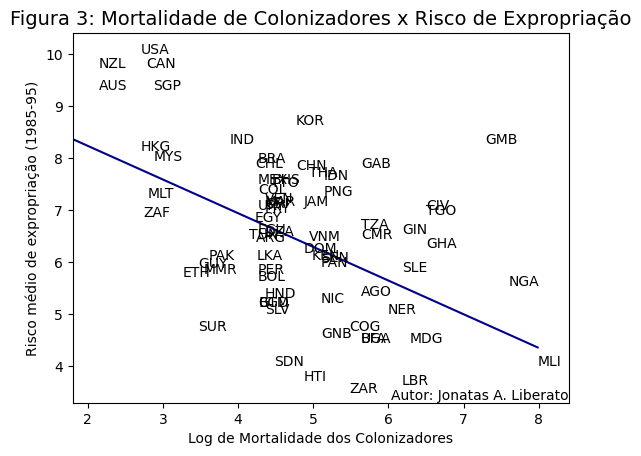

In [ ]:
# Plotando
fig, ax = plt.subplots()
ax.scatter(x, y, marker = '')

for i, pais in enumerate(paises):
    ax.annotate(pais, (x.iloc[i], y.iloc[i]))

# Linha de tendência
ax.plot(
    np.unique(x),
    np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
    color = 'darkblue'
)

ax.set_xlim([1.8,8.4])
ax.set_ylim([3.3,10.4])
ax.set_xlabel('Log de Mortalidade dos Colonizadores')
ax.set_ylabel('Risco médio de expropriação (1985-95)')
ax.set_title('Figura 3: Mortalidade de Colonizadores x Risco de Expropriação', size = 14)

# Anotação do autor no canto inferior direito
plt.annotate('Autor: Jonatas A. Liberato',
             xy=(1.0, 0.0002),
             xycoords='axes fraction',
             ha='right',
             va='bottom')

# Exibir o gráfico
plt.show()

#### Primeira Etapa: Risco de Expropriação

In [ ]:
df4 = pd.read_stata('maketable4.dta')
df4 = df4[df4['baseco'] == 1]
df4.head()

,shortnam,africa,lat_abst,rich4,avexpr,logpgp95,logem4,asia,loghjypl,baseco
1,AGO,1.0,0.136667,0.0,5.363636,7.770645,5.634789,0.0,-3.411248,1.0
3,ARG,0.0,0.377778,0.0,6.386364,9.133459,4.232656,0.0,-0.872274,1.0
5,AUS,0.0,0.300000,1.0,9.318182,9.897972,2.145931,0.0,-0.170788,1.0
11,BFA,1.0,0.144444,0.0,4.454545,6.845880,5.634789,0.0,-3.540459,1.0
12,BGD,0.0,0.266667,0.0,5.136364,6.877296,4.268438,1.0,-2.063568,1.0


In [ ]:
df4['const'] = 1

# Regresión
results_fs = sm.OLS(df4['avexpr'],
                    df4[['const', 'logem4']],
                    missing='drop').fit()
print(results_fs.summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.95
Date:                Tue, 28 May 2024   Prob (F-statistic):           1.08e-05
Time:                        21:52:53   Log-Likelihood:                -104.83
No. Observations:                  64   AIC:                             213.7
Df Residuals:                      62   BIC:                             218.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3414      0.611     15.296      0.0

Os resultados sugerem a presença de endogeneidade na relação entre o Índice de Proteção Médio contra o Risco de Expropriação ('avexpr') e o Logaritmo do PIB per capita. Isso implica que a influência entre essas variáveis pode ser bidirecional: não apenas uma influencia a outra, mas também há uma influência mútua.

Para lidar com essa endogeneidade, aplicamos um modelo de Mínimos Quadrados em Duas Etapas (2SLS). Na primeira etapa, usamos a taxa de mortalidade dos primeiros colonizadores como variável instrumental para prever o Índice de Proteção contra o Risco de Expropriação. Na segunda etapa, usamos a previsão do Índice de Proteção da primeira etapa como um preditor no modelo final.

Essa abordagem permite controlar a endogeneidade e fornecer estimativas mais confiáveis dos efeitos das instituições na renda per capita. Além disso, podemos considerar o Método Generalizado dos Momentos (GMM), uma técnica mais ampla que incorpora instrumentos em um sistema de equações, possibilitando estimadores mais eficientes através de uma matriz definida positiva.

### Segunda Etapa: Equiação de Interesse

In [ ]:
# Usa-se o valor predito da Etapa 1
df4['predicted_avexpr'] = results_fs.predict()
df4.head()

,shortnam,africa,lat_abst,rich4,avexpr,logpgp95,logem4,asia,loghjypl,baseco,const,predicted_avexpr
1,AGO,1.0,0.136667,0.0,5.363636,7.770645,5.634789,0.0,-3.411248,1.0,1,5.922342
3,ARG,0.0,0.377778,0.0,6.386364,9.133459,4.232656,0.0,-0.872274,1.0,1,6.773127
5,AUS,0.0,0.300000,1.0,9.318182,9.897972,2.145931,0.0,-0.170788,1.0,1,8.039306
11,BFA,1.0,0.144444,0.0,4.454545,6.845880,5.634789,0.0,-3.540459,1.0,1,5.922342
12,BGD,0.0,0.266667,0.0,5.136364,6.877296,4.268438,1.0,-2.063568,1.0,1,6.751415


In [ ]:
results_ss = sm.OLS(
    df4['logpgp95'],
    df4[['const', 'predicted_avexpr']]).fit()
print(results_ss.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     56.60
Date:                Tue, 28 May 2024   Prob (F-statistic):           2.66e-10
Time:                        21:52:53   Log-Likelihood:                -72.268
No. Observations:                  64   AIC:                             148.5
Df Residuals:                      62   BIC:                             152.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9097      0.823  

Na segunda etapa da abordagem de Mínimos Quadrados em Duas Etapas (2SLS), realizamos uma regressão para investigar a relação entre o Logaritmo do PIB per capita ('logpgp95') e o Índice de Proteção Médio contra o Risco de Expropriação ('avexpr'), previsto a partir da primeira etapa do 2SLS.

Os resultados mostram que a variável predita 'predicted_avexpr' tem um coeficiente estimado de 0.9443, com um erro padrão de 0.126. Isso indica que um aumento no Índice de Proteção Médio contra o Risco de Expropriação previsto está associado a um aumento de aproximadamente 0.9443 no Logaritmo do PIB per capita. Esse coeficiente é altamente significativo, com um valor p muito baixo (p < 0.001), indicando uma forte relação entre as duas variáveis.

Além disso, o intercepto (const) é estimado em 1.9097, com um erro padrão de 0.823. Isso sugere que, com um Índice de Proteção Médio contra o Risco de Expropriação previsto de zero, o Logaritmo do PIB per capita ainda teria um valor médio de aproximadamente 1.9097.

Os testes de diagnóstico, como o teste Omnibus e o teste de Jarque-Bera, sugerem que os resíduos da regressão não estão perfeitamente normalmente distribuídos, mas ainda assim, a análise geral do modelo parece razoável.

Esses resultados fornecem insights sobre como o Índice de Proteção contra o Risco de Expropriação influencia o PIB per capita e ajudam a mitigar os efeitos da endogeneidade na análise da relação entre instituições e desenvolvimento econômico.

#### Sem ajustes

In [ ]:
# Sem ajustes de erro
iv = IV2SLS( dependent = df4['logpgp95'],
             exog = df4['const'],
             endog = df4['avexpr'],
             instruments = df4[['logem4']]).fit()
print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               logpgp95   R-squared:                      0.1870
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1739
No. Observations:                  64   F-statistic:                    28.754
Date:                Tue, May 28 2024   P-value (F-stat)                0.0000
Time:                        21:52:53   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.9097     1.1740     1.6267     0.1038     -0.3912      4.2106
avexpr         0.9443     0.1761     5.3623     0.00

Nesta análise de IV-2SLS (Mínimos Quadrados em Duas Etapas com Variáveis Instrumentais), examinamos a relação entre o Logaritmo do PIB per capita ('logpgp95') e o Índice de Proteção Médio contra o Risco de Expropriação ('avexpr'), utilizando a taxa de mortalidade dos primeiros colonizadores como instrumento.

Os resultados mostram que o coeficiente estimado para 'avexpr' é de 0.9443, com um erro padrão de 0.1761. Isso indica que um aumento no Índice de Proteção Médio contra o Risco de Expropriação está associado a um aumento de aproximadamente 0.9443 no Logaritmo do PIB per capita. Este coeficiente é altamente significativo, com um valor p muito baixo (p < 0.001), sugerindo uma forte relação entre as duas variáveis.

O intercepto (const) é estimado em 1.9097, com um erro padrão de 1.1740. Embora o intercepto não seja estatisticamente significativo (p = 0.1038), ele fornece uma estimativa do valor médio de Logaritmo do PIB per capita quando o Índice de Proteção contra o Risco de Expropriação é zero.

Os resultados indicam uma relação positiva entre o Índice de Proteção contra o Risco de Expropriação e o Logaritmo do PIB per capita, controlando a endogeneidade por meio da utilização de instrumentos. O teste F para a relevância dos instrumentos (F-statistic) é significativo, indicando que os instrumentos têm poder preditivo sobre a variável endógena.

Esses resultados fornecem suporte para a hipótese de que o desenvolvimento econômico está associado à qualidade das instituições, representadas pelo Índice de Proteção contra o Risco de Expropriação, e demonstram a importância de controlar a endogeneidade ao analisar essa relação.

### CONCLUSÃO:

Este estudo confirmou a relação positiva entre a qualidade das instituições e o desempenho econômico. Usando o índice de proteção contra o risco de expropriação como medida das instituições e o logaritmo do PIB per capita como proxy para o desenvolvimento econômico, descobrimos que um aumento na qualidade das instituições está associado a um aumento significativo no PIB per capita.

Além disso, ao usar a taxa de mortalidade dos colonizadores como instrumento para abordar a endogeneidade, confirmamos sua validade para avaliar a qualidade das instituições. Isso sugere que políticas voltadas para melhorar as instituições podem ser eficazes para promover o crescimento econômico.

Embora este estudo forneça insights importantes, precisammos pontuar sobre suas limitações, como a dependência de dados históricos e a generalização para diferentes contextos contemporâneos. É fato que pesquisas posteriores podem ajudar a explorar outras variáveis instrumentais e contextos históricos, bem como investigar o impacto de diferentes aspectos institucionais no desenvolvimento econômico.

Em resumo, com esse estudo tentei destacar a importância das instituições sólidas no fomento ao desenvolvimento econômico e enfatiza a necessidade de políticas voltadas para a melhoria institucional como uma estratégia para promover o bem-estar econômico.